Notebook written by David Shimshoni

Tic Tac Toe Environment (script renamed hajeTTTENV) created by Kim Jeong Ju, Dustin Michels, and Johann Miller, used here under the terms of the MIT License. Original work found here: https://github.com/haje01/gym-tictactoe

In [2]:
import os
import sys
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import gym

LOCAL_PATH = os.getcwd()
print(os.listdir(LOCAL_PATH))
sys.path.append(LOCAL_PATH)
sys.path.append(LOCAL_PATH + '/lib')

from hajeTTTEnv import *

['.ipynb_checkpoints', 'lib', 'TicTacToeTrialRun.ipynb']


In [3]:
env = TicTacToeEnv()
env.render()

   | | 
  -----
   | | 
  -----
   | | 



In [6]:
dir(env)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_obs',
 '_show_board',
 '_show_episode',
 '_show_result',
 '_show_turn',
 'action_space',
 'alpha',
 'available_actions',
 'board',
 'close',
 'done',
 'mark',
 'metadata',
 'observation_space',
 'render',
 'reset',
 'reward_range',
 'seed',
 'set_start_mark',
 'show_episode',
 'show_number',
 'show_result',
 'show_turn',
 'spec',
 'start_mark',
 'step',
 'unwrapped']

In [8]:
env.action_space

Discrete(9)

In [9]:
env.observation_space

Discrete(9)

In [10]:
state = env.reset()
state

((0, 0, 0, 0, 0, 0, 0, 0, 0), 'O')

In [13]:
dir(env.action_space)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_np_random',
 'contains',
 'dtype',
 'from_jsonable',
 'n',
 'np_random',
 'sample',
 'seed',
 'shape',
 'to_jsonable']

In [14]:
qlearn_Q = np.zeros((env.action_space.n, 3, 3, 3, 3, 3, 3, 3, 3, 3))
qlearn_Q[[0, 1, 2, 3, 4], 0, 0, 0, 0, 0, 0, 0, 0, 0]

array([0., 0., 0., 0., 0.])

In [96]:
## Note: By default environment assumes 'O' starts first. Has positive reward
## The second mark, X, goes second, and has a negative reward
def q_learning_train_function(n_episodes=100000, visualize_env=False, print_output=False,
                        alpha=0.3, gamma=0.9, epsilon=0.1):
    
    ################################### 
    ### Q-TABLE INITIALIZATION HERE ### 

    ## Q-table is 10 dimensions, the first being the action space(9 rows).
    ## The remaining 9 dimensions are one of the three possible values of each square:
    ## 0 is blank, 1 is 'O', 2 is 'X'

    qlearn_Q = np.zeros((env.action_space.n, 
                         3, 3, 3, 
                         3, 3, 3, 
                         3, 3, 3))

    ################################### 

    R_q_agent = [] # for collecting returns
    T_q_agent = [] # for collecting number of timesteps

    start = random.uniform(0, 1)
    if start > 0.5:
        start_first= True
    else:
        start_first = False

    for i_episode in range(n_episodes):

        agent_turn = start_first

        if print_output:
            print('Episode: ' + str(i_episode+1))

        # Reset environment at the beginning of each episode. 
        observation, mark = env.reset()

        done = False

        t = 0 # timestep counter
        ep_return = 0 # return_counter

        available_actions = env.available_actions()

        # Loop through time steps. 
        while not done:

            if print_output:
                print('Timestep: ' + str(t+1))

            # Visualize state of the environment. 
            if visualize_env:
                env.render()
                print('\n ')

            if agent_turn:
                # Pick an action. (Agent's Turn)
                ############################ 
                ### E-GREEDY POLICY HERE ###

                explore = random.uniform(0, 1)

                if explore > epsilon:
                    if start_first:
                        action_index = np.argmax(qlearn_Q[available_actions, 
                                                         observation[0], observation[1], observation[2],
                                                         observation[3], observation[4], observation[5],
                                                         observation[6], observation[7], observation[8]])
                    else:
                        action_index = np.argmin(qlearn_Q[available_actions, 
                                                         observation[0], observation[1], observation[2],
                                                         observation[3], observation[4], observation[5],
                                                         observation[6], observation[7], observation[8]])
                    action = available_actions[action_index]
                else:
                    action = np.random.choice(available_actions)

                ############################ 
            else:
                action = np.random.choice(available_actions)

            if print_output:
                print('Action: ', action)

            # Step through and observe new state and reward. 
            ##########################
            ### STEP FUNCTION HERE ###

            (next_observation, next_mark), reward, done, info = env.step(action)
            available_actions = env.available_actions()

            ##########################

            ###########################
            ### Q-VALUE UPDATE HERE ###

            try:
                if start_first:
                    next_obs_Q = qlearn_Q[available_actions[np.argmax(qlearn_Q[available_actions, 
                                                         next_observation[0], next_observation[1], next_observation[2],
                                                         next_observation[3], next_observation[4], next_observation[5],
                                                         next_observation[6], next_observation[7], next_observation[8]])], 
                                      next_observation[0], next_observation[1], next_observation[2],
                                      next_observation[3], next_observation[4], next_observation[5],
                                      next_observation[6], next_observation[7], next_observation[8]]
                else:
                    next_obs_Q = qlearn_Q[available_actions[np.argmin(qlearn_Q[available_actions, 
                                                         next_observation[0], next_observation[1], next_observation[2],
                                                         next_observation[3], next_observation[4], next_observation[5],
                                                         next_observation[6], next_observation[7], next_observation[8]])], 
                                      next_observation[0], next_observation[1], next_observation[2],
                                      next_observation[3], next_observation[4], next_observation[5],
                                      next_observation[6], next_observation[7], next_observation[8]]

            except ValueError:
                next_obs_Q = 0
            old_Q = qlearn_Q[action, 
                            observation[0], observation[1], observation[2],
                            observation[3], observation[4], observation[5],
                            observation[6], observation[7], observation[8]]
            updated_Q = old_Q + alpha * (reward + gamma * next_obs_Q - old_Q)

            qlearn_Q[action, 
                    observation[0], observation[1], observation[2],
                    observation[3], observation[4], observation[5],
                    observation[6], observation[7], observation[8]] = updated_Q
            observation = next_observation
            mark = next_mark

            ###########################

            # Update counters.
            if start_first:
                ep_return += reward
            else:
                ep_return -= reward

            t += 1
            agent_turn = not agent_turn

            if print_output:
                print('Reward: ' + str(reward))

            # Check if we reached the terminal state. 
            if done:
                R_q_agent.append(ep_return)
                T_q_agent.append(t)
                start_first = not start_first
                break

        if print_output:
            print("Timesteps taken: {}".format(t))
            print("Episode return: {}".format(ep_return))

    env.close()
    return qlearn_Q, R_q_agent, T_q_agent

In [100]:
epsilons = [0.1, 0.2]
results = {}
for epsilon in epsilons:
    results[epsilon] = {}
    train_results = q_learning_train_function(epsilon=epsilon)
    results[epsilon]["q_table"] = train_results[0]
    results[epsilon]["reward"] = np.array(train_results[1])
    results[epsilon]["timesteps"] = np.array(train_results[2])

In [102]:
for epsilon in results:
    print("Epsilon = ", epsilon)
    print("Games won in first 500 games: ", np.sum(results[epsilon]["reward"][:500] == 1))
    print("Games won in last 500 games: ", np.sum(results[epsilon]["reward"][-500:] == 1))

Epsilon =  0.1
Games won in first 500 games:  291
Games won in last 500 games:  411
Epsilon =  0.2
Games won in first 500 games:  274
Games won in last 500 games:  411


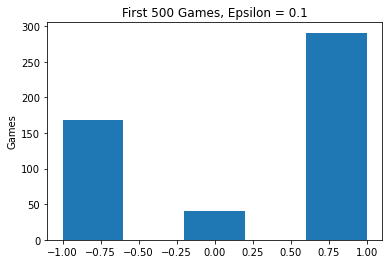

In [106]:
plt.hist(results[0.1]["reward"][:500], bins=5)
plt.title("First 500 Games, Epsilon = 0.1")
plt.ylabel("Games")
plt.show()

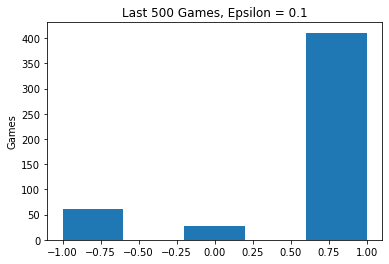

In [107]:
plt.hist(results[0.1]["reward"][-500:], bins=5)
plt.title("Last 500 Games, Epsilon = 0.1")
plt.ylabel("Games")
plt.show()

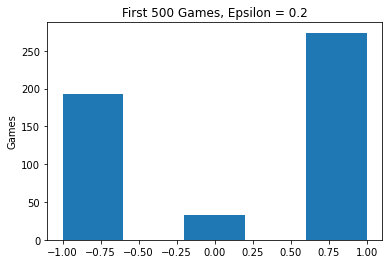

In [108]:
plt.hist(results[0.2]["reward"][:500], bins=5)
plt.title("First 500 Games, Epsilon = 0.2")
plt.ylabel("Games")
plt.show()

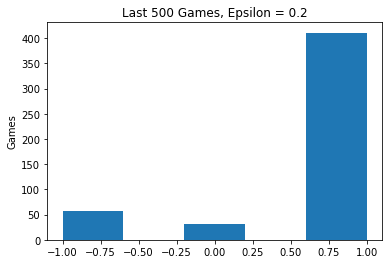

In [109]:
plt.hist(results[0.2]["reward"][-500:], bins=5)
plt.title("Last 500 Games, Epsilon = 0.2")
plt.ylabel("Games")
plt.show()

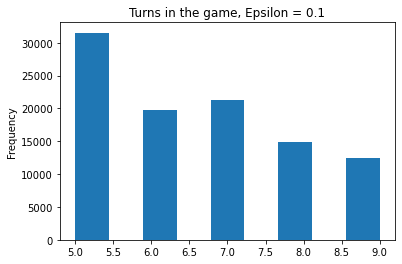

In [112]:
plt.hist(results[0.1]["timesteps"], bins=9)
plt.title("Turns in the game, Epsilon = 0.1")
plt.ylabel("Frequency")
plt.show()

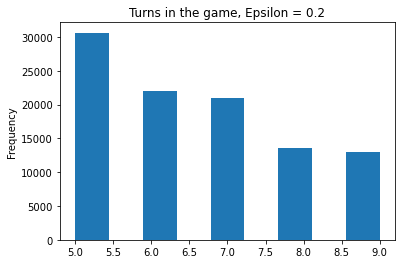

In [113]:
plt.hist(results[0.2]["timesteps"], bins=9)
plt.title("Turns in the game, Epsilon = 0.2")
plt.ylabel("Frequency")
plt.show()